In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import tensorflow.keras as keras


In [2]:
filepath = os.path.join(os.getcwd(), 'df.csv')


In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head(10)

stadium   birthdate       date1  time1  distance1  trap1  \
0  Central Park  2018-12-01  2020-12-07  17.13        265      5   
1  Central Park  2018-12-01  2020-12-15  17.09        265      6   
2  Central Park  2018-12-01  2020-12-22  16.81        265      6   
3  Central Park  2018-12-01  2021-01-12  17.32        265      6   
4  Central Park  2018-12-01  2021-01-19  17.10        265      6   
5  Central Park  2018-12-01  2021-01-27  16.84        265      6   
6  Central Park  2018-12-01  2021-05-19  17.36        265      5   
7  Central Park  2018-12-01  2021-05-27  17.08        265      6   
8  Central Park  2018-12-01  2021-06-08  16.66        265      6   
9  Central Park  2018-12-01  2021-06-15  17.07        265      6   

                                    comment1       date2  distance2  trap2  \
0                  slow away, middle to wide  2020-12-15        265      6   
1                             wide, led half  2020-12-22        265      6   
2         wide, missed trouble and led first  2021-01-12        265      6   
3   badly crowded half, badly baulked second  2021-01-19        265      6   
4                    wide, challenged run in  2021-01-27        265      6   
5     quick away, wide, challenged near line  2021-02-03        265      6   
6                            very wide first  2021-05-27        265      6   
7  early pace, middle to wide, led near line  2021-06-08        265      6   
8                 early pace, wide, soon led  2021-06-15        265      6   
9             early pace, wide, every chance  2021-06-28        265      5   

   time2  
0  17.09  
1  16.81  
2  17.32  
3  17.10  
4  16.84  
5  16.93  
6  17.08  
7  16.66  
8  17.07  
9  17.17

In [5]:
df.shape

(533228, 11)

In [6]:
df.isnull().sum()


stadium        0
birthdate      0
date1          0
time1          0
distance1      0
trap1          0
comment1     213
date2          0
distance2      0
trap2          0
time2          0
dtype: int64

In [7]:
df.dtypes

stadium       object
birthdate     object
date1         object
time1        float64
distance1      int64
trap1          int64
comment1      object
date2         object
distance2      int64
trap2          int64
time2        float64
dtype: object

In [8]:
df = df.drop(columns = ["comment1"])
df.columns

Index(['stadium', 'birthdate', 'date1', 'time1', 'distance1', 'trap1', 'date2',
       'distance2', 'trap2', 'time2'],
      dtype='object')

In [9]:
df = pd.get_dummies(df, prefix = "stadium_", columns = ["stadium"])

In [10]:
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['date1'] = pd.to_datetime(df['date1'])
df['date2'] = pd.to_datetime(df['date2'])

In [11]:
df["day_age_1"] = (df['date1'] - df['birthdate']).dt.days
df["day_age_2"] = (df['date2'] - df['birthdate']).dt.days
df["days_between_race"] = (df['date2'] - df['date1']).dt.days

df = df.drop(columns = ["birthdate", "date1", "date2"])

In [12]:
df["velocity1"] = df["distance1"] / df["time1"]

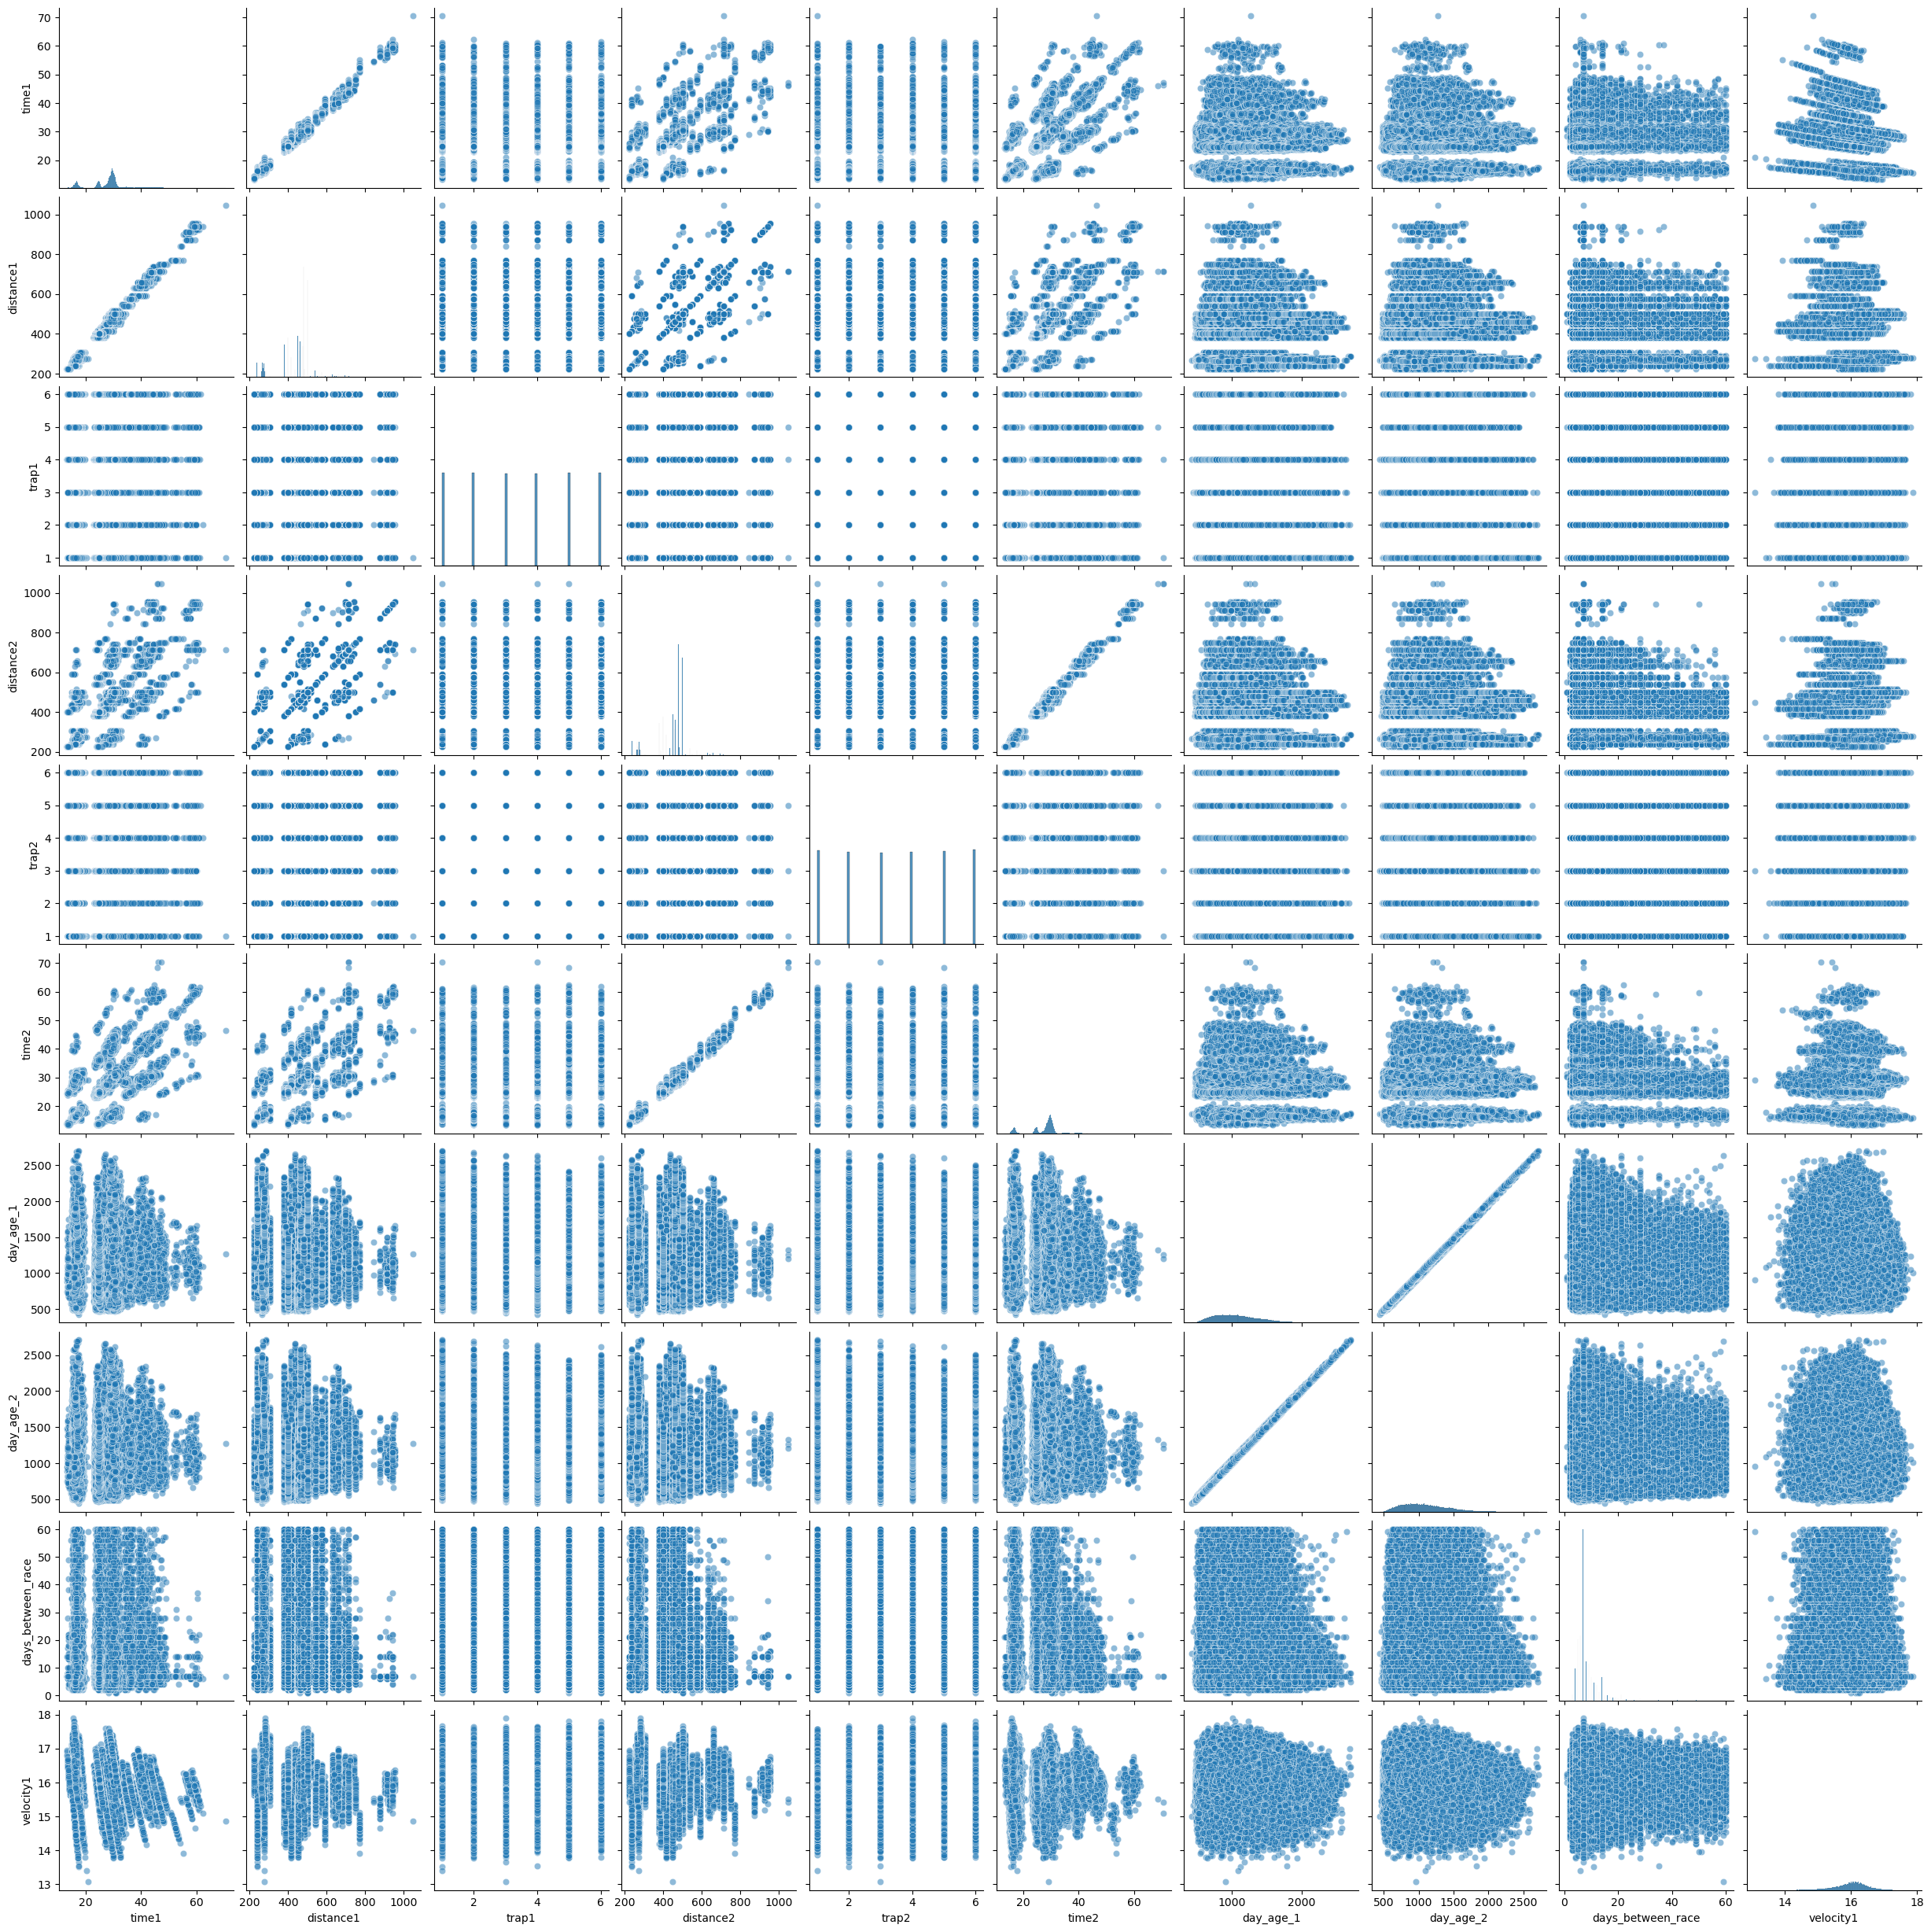

In [13]:
sns.pairplot(df.select_dtypes(exclude=['bool']), kind = "scatter", diag_kind = "hist", plot_kws = {'alpha': 0.5})

<Axes: >

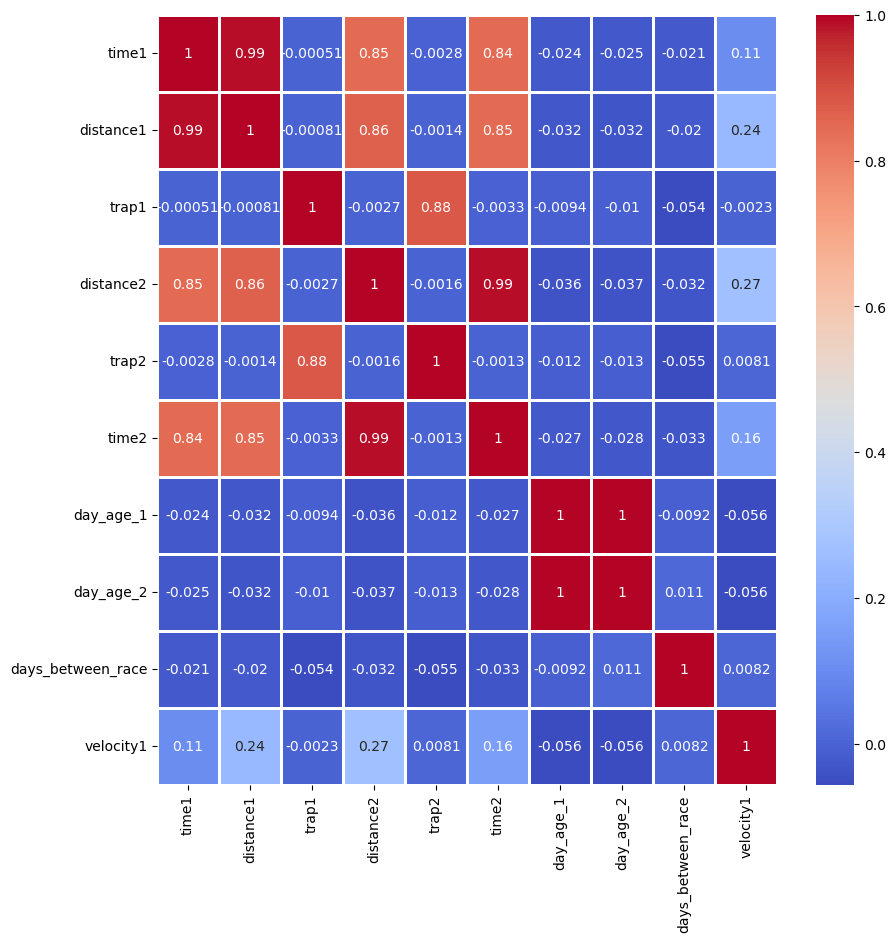

In [14]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df.select_dtypes(exclude="bool").corr(), annot = True, cmap = 'coolwarm', linewidths=1)

# IMPLEMENT MODELS

In [15]:
y = df["time2"]
X = df.drop(columns =["time2"])


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

In [16]:
lin_reg = linear_model.LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lin_reg.predict(X_test)

Text(0, 0.5, 'Y pred')

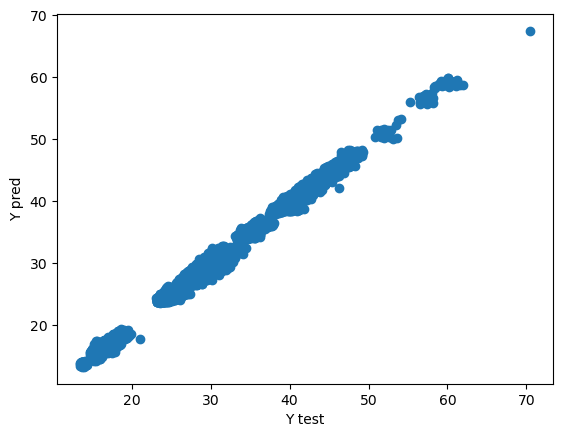

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y test")
plt.ylabel("Y pred")

In [20]:
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean square error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean square error: 0.16252602727136595
Root Mean square error: 0.40314516897932184
